<a href="https://colab.research.google.com/github/Kane0068/classifying-images-of-clothing/blob/main/CLASS%C4%B0FY%C4%B0NG_IMAGES_OF_CLOTH%C4%B0NG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLASSİFYİNG IMAGES OF CLOTHİNG

## 1- İNSTALL AND İMPORT DEPENDENCİES

In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

##2-İMPORT THE FASHİON MNIST DATASET

In [ ]:
dataset,metadata = tfds.load("fashion_mnist",as_supervised=True,with_info=True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_dataset,test_dataset = dataset["train"],dataset["test"]

In [ ]:
# vERİLERİMİZİN İSİMLERİE BAKALIM
class_names = metadata.features["label"].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 3-PREPROCESS THE DATA

Verilerin 0-1 sayılarına dönüştürmemiz gerekiyor

In [ ]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels


In [ ]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
## Daha hızlı verim almamız için
train_dataset = train_dataset.cache()
test_dataset =test_dataset.cache()

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


##4- EXPLORE THE PROCESSED DATA
İŞLENMİŞ VERİMİZE BİR BAKALIM


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


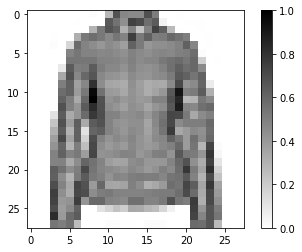

In [ ]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

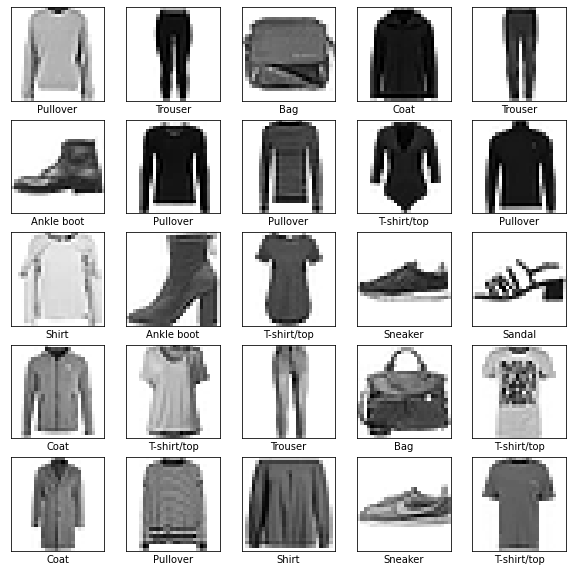

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

##5-CREATE THE MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

##6-COMPİLE THE MODEL

In [ ]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

## 7- TRAİN THE MODEL

İŞLERİ HIZLANDIRMAK İÇİN BATCH SİZE EKLİYORUZ

In [ ]:
BATCH_SİZE =32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SİZE)
test_dataset=test_dataset.cache().batch(BATCH_SİZE)

In [ ]:
model.fit(train_dataset,epochs = 5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SİZE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4929 - accuracy: 0.8276
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3328 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.8944




## EVALUATE ACCURACY

In [ ]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print("Accuracy on test dateset :" , test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3489 - accuracy: 0.8750
Accuracy on test dateset : 0.875


##8-MAKE PREDİCT

In [ ]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 140ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([2.1809520e-04, 4.8158386e-06, 6.9542420e-03, 1.4492846e-06,
       9.6941108e-01, 1.4947551e-08, 2.3407588e-02, 4.2181491e-11,
       2.6447397e-06, 2.8929328e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels

array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5])

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

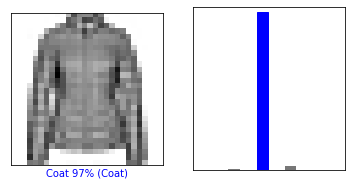

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

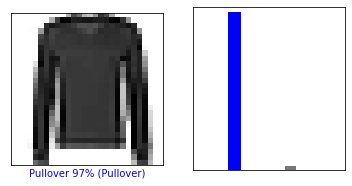

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

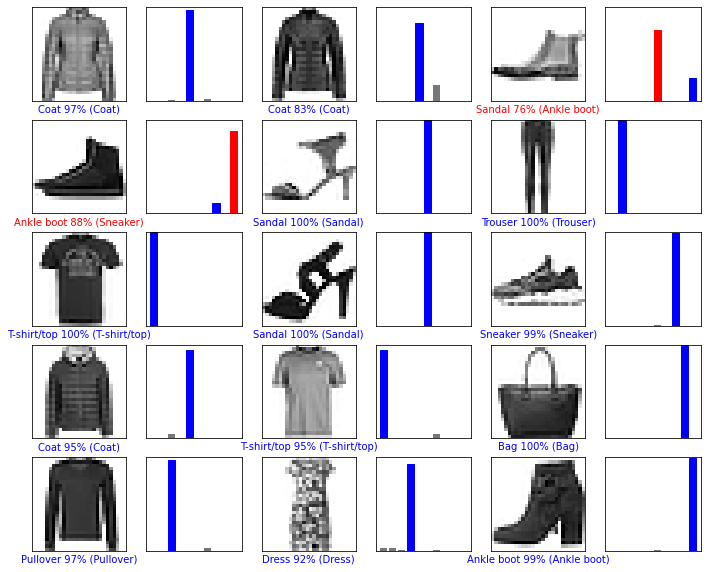

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)